In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_env import EvidenceEnv

Part 1

In [2]:
class RandomAgent(object):
    def __init__(self, env):
        """
        Args:
        env: an environment
        """
        self.env = env
        
    def act(self, observation):
        """
        Act based on observation and train agent on cumulated reward (return)
        :param
        observation: new observation
        :param
        reward: reward gained from previous action; None indicates no reward because of initial state
        :return
        : action (Variable)
        """
        return np.random.choice(self.env.n_action)
    
    def train(self, a, old_obs, r, new_obs):
        """
        :param
        a: action
        :param
        old_obs: old observation
        :param
        r: reward
        :param
        new_obs: new observation
        :return
        :
        """
        pass

In [3]:
# Number of iterations
n_iter = 1000
# environment specs
env = EvidenceEnv(n=2,p=0.95)
# define agent
agent = RandomAgent(env)
# reset environment and agent
obs = env.reset()
reward = None
done = False
R = []
for step in range(n_iter):
    env.render()
    action = agent.act(obs)
    _obs, reward, done, _ = env.step(action)
    # no training involved for random agent
    agent.train(action, obs, reward, _obs)
    obs = _obs
    R.append(reward)

0
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
0
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
0
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
1
1
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
0
1
1
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
1
0
0
0
1
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
0
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
0
0
0
1
0
1
1
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
0
1
1
0
1
0
0
1
0
1
0
0
0
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
1
0
1
1
0
1
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0
1
0
0
0


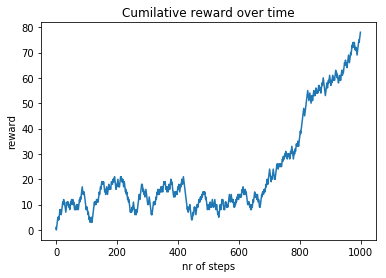

In [4]:
plt.xlabel('nr of steps')
plt.ylabel('reward')
timestep = range(0,np.size(R))
plt.plot(timestep,np.cumsum(R))
plt.title('Cumilative reward over time')
plt.show()

Part 2

In [5]:
class TabularQAgent(object):
    def __init__(self, env):
        """
        Args:
        env: an environment
        """
        self.env = env
        self.Q = np.zeros([4,2])
        self.y = 0.9
        self.lr = 0.9
        
    def act(self, observation):
        """
        Act based on observation and train agent on cumulated reward (return)
        :param
        observation: new observation
        :param
        reward: reward gained from previous action; None indicates no reward because of initial state
        :return
        : action (Variable)
        """
        return np.argmax(self.Q[self.env.asint(observation)])
    
    def train(self, a, old_obs, r, new_obs):
        """
        :param
        a: action
        :param
        old_obs: old observation
        :param
        r: reward
        :param
        new_obs: new observation
        :return
        :
        """
        new_obsi = self.env.asint(new_obs)
        old_obsi = self.env.asint(old_obs)
        if new_obsi not in self.Q:
            Qest = np.random.uniform()
        else:
            Qest = max(self.Q[new_obsi])
        Qbell = self.Q[old_obsi,a] + self.lr * (r + self.y * Qest - self.Q[old_obsi,a])
        self.Q[old_obsi,a] = Qbell
        pass
    
    def plotQ(self):
        plt.matshow(self.Q)
        plt.xlabel('action')
        plt.ylabel('reward')
        plt.title('Q values')
        plt.show()
        pass

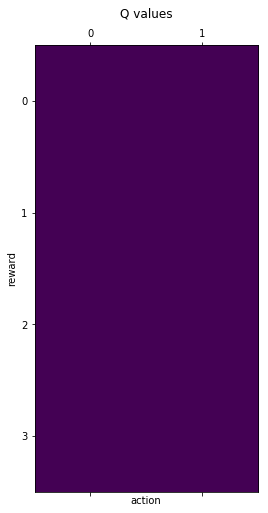

In [6]:
# Number of iterations
n_iter = 1000
# environment specs
env = EvidenceEnv(n=2,p=0.95)
# define agent
agent = TabularQAgent(env)
# reset environment and agent
obs = env.reset()
agent.plotQ()

In [7]:
reward = None
done = False
R = []
for step in range(n_iter):
    env.render()
    action = agent.act(obs)
    _obs, reward, done, _ = env.step(action)
    # no training involved for random agent
    agent.train(action, obs, reward, _obs)
    obs = _obs
    R.append(reward)

1
0
1
0
1
0
0
0
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
1
0
0
0
0
0
1
1
1
1
0
1
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
1
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
0
1
1
1
0
1
0
1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
1
1
0
0
1
1
0
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
0
1
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
0
1
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
1
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
1
1
1
0
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
0
1
0
0
0
0
0


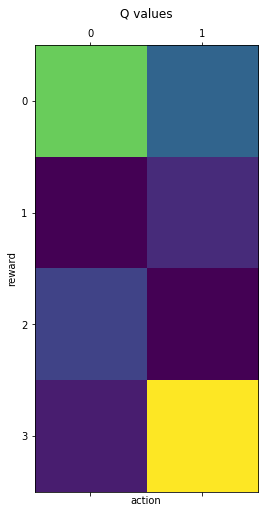

In [8]:
agent.plotQ()

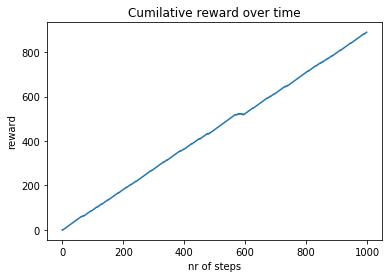

In [9]:
plt.xlabel('nr of steps')
plt.ylabel('reward')
timestep = range(0,np.size(R))
plt.plot(timestep,np.cumsum(R))
plt.title('Cumilative reward over time')
plt.show()